In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from random import randrange

# Data for final consumption and total output

## Final consumption

In [51]:
fdata = pd.read_csv('fdata_deu.csv', sep = ',')
fdata.head()

,Unnamed: 0,f,fmin,fmax,f.maxF,f.maxX
0,A01,21457.851487,0,19312.930956,19312.930956,19312.930956
1,A02,3034.759567,0,2731.283611,2.427354,2.427354
2,A03,366.298763,0,329.668887,329.668887,329.668887
3,B,11531.103621,0,10378.720960,5458.072038,5458.072038
4,C10-C12,180232.806666,0,162262.891729,162262.891729,162262.891729


In [3]:
f = fdata.iloc[:,1].astype('float')
f_max = np.array(fdata.iloc[:,3].astype('float'))
f_max
f.shape

(55,)

In [4]:
demand_shock = np.zeros(f_max.shape[0])
for i in range (0,f_max.shape[0]):
    demand_shock[i] = round(1- f_max[i]/f[i],3)
    
print(demand_shock) # ok 

[0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.099 0.081
 0.1   0.1   0.1   0.1   0.099 0.1   0.1   0.1   0.099 0.099 0.1   0.023
 0.015 0.036 0.1   0.1   0.098 0.095 0.569 0.114 0.503 0.223 0.034 0.731
 0.038 0.043 0.011 0.088 0.029 0.013 0.02  0.002 0.093 0.094 0.083 0.1
 0.035 0.042 0.002 0.007 0.001 0.043 0.   ]


In [5]:
demand_shock = np.array(demand_shock)

## Total output

In [6]:
xdata =  pd.read_csv('xdata_deu.csv', sep = ',')
xdata.tail()   

,Unnamed: 0,x,xmin,xmax,x.maxF,x.maxX
50,O84,326446.9910,0,326446.991000,306201.098420,306201.098420
51,P85,205736.8240,0,205736.824000,200894.751180,200894.751180
52,Q,381918.5085,0,381918.508500,380852.716052,380852.716052
53,R_S,195188.5340,0,75740.830036,75740.830036,75740.830036
54,T,9955.7790,0,9955.779000,9955.778971,9955.778971


In [7]:
x = xdata.iloc[:,1].astype('float')
x_max = np.array(xdata.iloc[:,3].astype('float'))

In [8]:
supply_shock = np.zeros(x_max.shape[0])
for i in range (0,x_max.shape[0]):
    supply_shock[i] = round(1- x_max[i]/x[i],6)
    
print(supply_shock) # ok: corresonds to the data 

[0.       0.849999 0.       0.483204 0.       0.685309 0.730686 0.342704
 0.       0.       0.189825 0.       0.352529 0.639448 0.726353 0.662572
 0.430758 0.630639 0.618354 0.696668 0.597033 0.652042 0.606449 0.
 0.       0.       0.715557 0.180259 0.       0.246592 0.       0.
 0.       0.       0.       0.646411 0.       0.       0.       0.07215
 0.       0.       0.       0.512768 0.362812 0.459166 0.410839 0.396788
 0.19581  0.426938 0.       0.       0.       0.611961 0.      ]


In [9]:
supply_shock = np.array(supply_shock)

# IO table 

In [10]:
df = pd.read_csv('deu_wiot.csv',sep = ',',low_memory=False)
df.head()

,Unnamed: 0,A01,A02,A03,B,C10-C12,C13-C15,C16,C17,C18,...,M71,M72,M73,M74_M75,N,O84,P85,Q,R_S,T
0,A01,4.164926e-02,0.022453,0.000046,0.000532,0.145642,2.236215e-03,1.373681e-04,9.344121e-05,3.726292e-05,...,0.000016,0.000169,0.000017,0.000188,0.001027,1.571802e-03,0.000152,0.000999,0.000331,0
1,A02,7.900009e-04,0.148384,0.000043,0.001372,0.000066,3.458867e-05,5.639422e-02,2.235241e-03,1.798931e-05,...,0.000065,0.000010,0.000031,0.000017,0.000071,2.544306e-05,0.000011,0.000018,0.000128,0
2,A03,4.366784e-07,0.000000,0.012957,0.000002,0.000357,2.755762e-07,1.188522e-07,4.207657e-07,5.563061e-07,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.194973e-07,0.000000,0.000017,0.000004,0
3,B,2.219650e-04,0.000084,0.000116,0.002035,0.000291,2.382501e-04,2.586815e-04,3.853536e-04,1.026987e-04,...,0.000133,0.000099,0.000066,0.000086,0.000063,1.312530e-04,0.000043,0.000079,0.000068,0
4,C10-C12,6.141175e-02,0.000821,0.001096,0.001411,0.128738,2.820159e-03,1.333614e-03,1.250540e-03,9.674707e-04,...,0.000423,0.001414,0.000287,0.000705,0.000292,7.647949e-03,0.001857,0.019801,0.001344,0


In [11]:
df = df.iloc[:,1:]# leaving out industries U and T
df = df.astype('float')
df.shape

(55, 55)

In [12]:
A = np.array(df)
N = A.shape[0]
A.shape

(55, 55)

## Matrix Z

In [13]:
df_Z = pd.read_csv('Zmatrix_deu.csv', sep=',', low_memory=False)
df_Z =  df_Z.iloc[:,1:]# leaving out industries U and T
df_Z = df_Z.astype('float')
df_Z.shape

(55, 55)

In [14]:
Z = np.array(df_Z)
N = Z.shape[0]
Z.shape

(55, 55)

In [15]:
x_0 = np.array(x)
x_0.shape

(55,)

In [16]:
f_0 = np.array(f)
f_0.shape

(55,)

In [17]:
L = np.linalg.inv(np.identity(N)-A)
L.shape

(55, 55)

# Optimization 

In [20]:
def max_output(N,L,A,xmax,fmax):
    z = np.ones(N)
    obj = -np.matmul(np.matrix.transpose(z), L)
    lhs_ineq = np.concatenate((-L,L))
    rhs_ineq = np.concatenate((np.zeros(N), xmax))
    
    bnd = []
    for i in range (0,N):
        bnd.append((0,fmax[i]))
    
    result = linprog(c = obj, A_ub= lhs_ineq, b_ub= rhs_ineq, bounds = bnd)
    
    optimal_output = -result.fun
    
    optimal_f = np.ones(N)
    for i in range(0,N):
        optimal_f[i] = result.x[i]
    
    return optimal_output, optimal_output/sum(x_0), sum(optimal_f)/sum(f_0)

In [22]:
def max_consumption(N,L,A,xmax,fmax):
    z = np.ones(N)
    obj2 = -np.matmul(np.matrix.transpose(z), np.identity(N)-A)
    lhs_ineq2 = np.concatenate((-(np.identity(N)-A), np.identity(N)-A))
    rhs_ineq2 = np.concatenate((np.zeros(N), fmax))
    
    bnd2 = []
    for i in range (0,N):
        bnd2.append((0,xmax[i]))
        
    result2 = linprog(c = obj2, A_ub= lhs_ineq2, b_ub= rhs_ineq2, bounds= bnd2)
    optimal_f_2 = -result2.fun
    
    optimal_output_2 = np.ones(N)
    for i in range(0,N):
        optimal_output_2[i] = round(result2.x[i])
        
    return result2.success, sum(optimal_output_2)/sum(x_0), optimal_f_2/sum(f_0)

In [24]:
N= 54
f_max = f_max[:N]
x_max = x_max[:N]
A = A[:N,:N]
Z = Z[:N,:N]
x_0 = x_0[:N]
f_0 = f_0[:N]
L = np.linalg.inv(np.identity(N)-A)
supply_shock = np.array(supply_shock[:N])
demand_shock = np.array(demand_shock[:N])

In [25]:
def algo_proportional(A, L, fmax, xmax, TT, prioritize="no"):
    x = [0]
    fvec = []          # initial demand vector
    fvec.append(fmax)
    r = [0]            # output constraints
    s = [0]            # input bottlenecks 
    d = [0]            # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]

    list_ = [1] 
    t=1
    epsilon = 1e-6
    while not np.all(abs(d[t] - d[t-1]) < epsilon) and t<TT:
        #print('\nIteration {0}'.format(t))
        #print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        r.append(np.ones(len(xmax)))
        s.append(np.ones(len(xmax)))
        fvec.append(np.ones(len(xmax)))
        x.append(np.ones(len(xmax)))
        d.append(np.ones(len(xmax)))
        
        ##########################################
        ########### Output constraints ###########
        ##########################################
        for i in range (0,len(x_max)):
            r[t][i] = xmax[i]/d[t][i]
        #print('Output constraints:{}'.format(r[t]))
        
        ##########################################
        ########### Input bottlenecks ############
        ##########################################
        for i in range(0,len(x_max)):
            for j in range(0,len(x_max)):
                if A[j][i] > 0:
                    list_.append(r[t][j])
            s[t][i] = min(list_)
            list_ = [1]
        #print('Input bottlenecks:{}'.format(s[t]))
        
        ##############################################
        ########### Constrained Production ###########
        ##############################################
        for i in range(0,len(xmax)):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
        #print('Constrained production:{}'.format(x[t]))
        
        ##############################################
        ############ Constrained Delivery ############
        ##############################################
        for i in range(0,len(xmax)):
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],x[t]),0)
        #print('Constrained delivery:{}'.format(fvec[t]))
        
        ###############################################
        ############ New Aggregated Demand ############
        ###############################################
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
        t=t+1
        #print('Aggregated Demand:         {}'.format(d[t]))
        if t == TT:
            print("Algoritm did not converge")
            
    return sum(x[t-1]), sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0), t


In [27]:
def algo_mixed(A, L, fmax, xmax, TT,prioritize="yes"):
    x = [0]
    #fout = [0]
    fvec = [] # initial demand vector
    fvec.append(fmax)
    r = [0]   # output constraints
    s = [0]   # input bottlenecks 
    d = [0]   # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]
    
    list_ = [1] 
    t=1
    epsilon = 1e-6
    while not np.all(abs(d[t] - d[t-1]) < epsilon) and t<TT:
        #print('\nIteration {0}'.format(t))
        #print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        r.append(np.ones(len(xmax)))
        s.append(np.ones(len(xmax)))
        fvec.append(np.ones(len(xmax)))
        x.append(np.ones(len(xmax)))
        d.append(np.ones(len(xmax)))
        #fout.append(np.ones(len(xmax)))
        
        ##########################################
        ########### Output constraints ###########
        ##########################################
        for i in range (0,len(x_max)):
            r[t][i] = xmax[i]/np.matmul(A[i],d[t])
        #print('Output constraints:         {}'.format(r[t]))
        
        ##########################################
        ########### Input bottlenecks ############
        ##########################################
        for i in range(0,len(x_max)):
            for j in range(0,len(x_max)):
                if A[j][i] > 0:
                    list_.append(r[t][j])
            s[t][i] = min(list_)
            list_ = [1]
        #print('Input bottlenecks:         {}'.format(s[t]))
        
        ##############################################
        ########### Constrained Production ###########
        ##############################################
        for i in range(0,len(xmax)):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
            #print(s[t][i]*d[t][i])
        
        ##############################################
        ############ Constrained Delivery ############
        ##############################################
        
        #for i in range(0,len(xmax)):
            #fout[t][i] = s[t][i]*d[t][i]
            #print(s[t][i]*d[t][i])
        
        for i in range(0,len(xmax)):
            #print(np.matmul(A[i],s[t]*d[t]))
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],x[t]),0) 
        #print('Constrained delivery:      {}'.format(fvec[t]))
        
        ###############################################
        ############ New Aggregated Demand ############
        ###############################################
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
        t=t+1
    
    if t == TT:
        print("Algoritm did not converge")
        
    return sum(x[t-1]), sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0), t

In [30]:
def order(A, L, fmax):
    d = np.matmul(L, fmax)
    list_1 = []      # list we will sort
    list_2 = []      # list that will not be sorted to find the original indices
    for i in range(A.shape[0]):
        list_1.append([])
        list_2.append([])
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            list_1[i].append(A[i][j]*d[j])    # list_1[i][j] = list_2[i][j] = A[i][j]*d[j]
            list_2[i].append(A[i][j]*d[j])
        list_1[i].sort(reverse = True)        # we sort list_1: A[i][j]*d[j] >= A[i][j+1]*d[j+1]

    names_ordered=[]
    for i in range(A.shape[0]):
        names_ordered.append([])
    
    for i in range(A.shape[0]):
        for k in list_1[i]:                  # we take the indices of the j+1 (j from 0 to N-1) biggest suppliers of industry i. 
                for l in range(A.shape[0]):    
                    if list_2[i][l] == k:
                        names_ordered[i].append(l)   
    return names_ordered

In [31]:
def algo_priority(A, L, fmax, xmax, ordered, TT= 30, prioritize="yes"): 
    #fout = [0]                
    x = [0]
    fvec = []   # initial demand vector
    fvec.append(fmax)
    rvec = [0]  # output constraints
    s = [0]     # input bottlenecks 
    d = [0]     # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]
    
    list_ = [1] 
    t=1
    epsilon = 1e-6
    
    while not np.all(abs(d[t] - d[t-1]) < epsilon) and t<TT:
        #print('\nIteration {0}'.format(t))
        #print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        rvec.append([np.zeros(N)])
        s.append(np.ones(N))
        fvec.append(np.ones(N))
        x.append(np.ones(N))
        #fout.append(np.ones(N))
        d.append(np.ones(N))
        demand = np.identity(N)
        
        som = 0
        for i in range(0,N):
            for j in range(0,N):
                for k in ordered[i][:j+1]:
                    som = som + A[i][k]*d[t][k] 
                demand[i][j] = som   #demand[i][j] = demand of j'th biggest customers of firm i summed up
                som = 0
        remainder = np.identity(N)
    
        for i in range(0,N):
            for j in range(0,N):
                remainder[i][j] = xmax[i] - demand[i][j]
                
        ####################################################
        ####################### rvec #######################
        ####################################################
        for i in range(0,N):
            rvec[t].append([])
        for i in range(0,N):
            if all(remainder[i][j]>0 for j in range(0,N)):
                rvec[t][i] = np.ones(N) 
            elif all(remainder[i][j]<=0 for j in range(0,N)): 
                rvec[t][i] = np.zeros(N)
                for k in ordered[i][:1]: 
                    rvec[t][i][k] = xmax[i]/demand[i][0]
        
            else: 
                idx = np.where(remainder[i]<=0) # index for partially met demand
                idx_fully = np.where(remainder[i]>0) 
                length = len(idx_fully[0])
                rvec[t][i] = np.zeros(N)
                for l in range(0,length-1):
                    index = ordered[i][l]
                    rvec[t][i][index] = 1
                m = ordered[i][length-1]
                rvec[t][i][m] = remainder[i][length-1]/(demand[i][length]-demand[i][length-1])
          
        #####################################################
        ################# Input bottlenecks #################
        #####################################################
        for i in range(0,N):
            for j in range(0,N):
                if A[j][i]>0:
                    list_.append(rvec[t][j][i])
            s[t][i] = min(list_)
            list_ = [1]   
        #print('Input bottlenecks:         {}'.format(s[t]))
        
        ######################################################
        ############### Constrained Production ###############
        ######################################################
        for i in range(0,N):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
        #print(x)
        #for i in range(0,N):
            #fout[t][i] = s[t][i]*d[t][i]
        ######################################################
        ################ Constrained Delivery ################
        ######################################################
        for i in range(0,len(xmax)):
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],x[t]),0)
        
        ######################################################
        ################ Aggregated demand ###################
        ######################################################
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
            
        t=t+1
        if t==TT:
            print("Algorithm did not converge")
            #return(None, None)
        #print(d[t])
    return sum(x[t-1]), sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0), t

In [35]:
def algo_random(A, L, fmax, xmax, runs, prioritize = "random"):
    som_x = []
    x = []
    y = []
    TT = 30
    while len(x)<runs:
        random_ordered=[]
        for i in range(N):
            random_ordered.append([])
    
        for i in range(N):
            while len(random_ordered[i])<N:
                random = randrange(N)
                while random in random_ordered[i]:
                    random = randrange(N)# we willen nu de indices van de j+1 (j van 0 tot en met N-1) grootste suppliers  
                random_ordered[i].append(random)
                
        result = algo_priority(A, L, fmax, xmax, random_ordered, TT, prioritize="yes")
        if result[3] != TT:
            som_x.append(result[0])
            #som_x = sum(som_x)/len(sum_x)
            x.append(result[1])
            y.append(result[2])
    return sum(som_x)/len(som_x), sum(x)/len(x), sum(y)/len(y)

# Effect Network Density

### Eliminate Ranom Links

In [38]:
def eliminate_rand(A, x, f, desired_density):
    #Anew = np.array(df)
    Anew = A
    zeros = np.sum(Anew==0)
    #Znew = np.array(df_Z)
    Znew = Z
    indices_x = []
    indices_y = []
    if desired_density != 1:
        sparselink = round((N**2)*(1-desired_density) - np.sum(Anew==0)) # number of links we need to remove to get desired density
        print("Sparselink: {0}".format(sparselink))
        while(np.sum(Znew==0)) < sparselink + zeros: 
            random_x = randrange(N)
            random_y = randrange(N)
            while Znew[random_x,random_y] == 0:
                random_x = randrange(N)
                random_y = randrange(N)
            #print(random_x,random_y)
            Znew[random_x, random_y] = 0
            #print(Znew[random_x, random_y])
        #indices_x = np.random.randint(0,Anew.shape[0], sparselink)
        #indices_y = np.random.randint(0,Anew.shape[1], sparselink)
        #print(len(indices_x))
        #print(len(indices_y))
        #for i in range(len(indices_x)):
            #print(i)
            #print(indices_x[i], indices_y[i])
            #Znew[indices_x[i], indices_y[i]] = 0
            #Znew[indices_y[i], indices_x[i]] = 0
            #print(Znew[indices_x[i], indices_y[i]])
            
    xnew = np.sum(Znew, axis=1) + f
    for i in range(0,N):
        for j in range(0,N):
            Anew[i][j] = Znew[i][j]/x[j]
    Lnew = np.linalg.inv(np.identity(N)-Anew)
    #xnew = Znew + f
    
    return xnew, Anew, Lnew, Znew

## Direct shock

**For 50 different densities, we adapt our matrix. We compute xnew, Anew, xmaxnew. Then we apply the shocks to the new data: instead of sum(xmax)/sum(x) it is now equal to sum(xmaxnew)/sum(xnew).**

In [40]:
resdir_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
for i in range(len(densseq)):
    print("Itaration {0}" .format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        resdir_x[i][j] = (sum(xmaxnew)/sum(newdat[0]))
resdir_x = np.mean(resdir_x, axis = 1)
resdir_x

Itaration 0
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Itaration 1
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparsel

Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Itaration 10
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
S

Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Itaration 20
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
S

Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Itaration 29
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
S

Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Itaration 39
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Itaration 4

Itaration 49


array([0.67569892, 0.67603238, 0.6762142 , 0.67692822, 0.67752432,
       0.6774745 , 0.67858769, 0.67968767, 0.67806904, 0.67940752,
       0.68140334, 0.67960818, 0.68121813, 0.68100236, 0.68190649,
       0.6828861 , 0.68305059, 0.68197182, 0.68372645, 0.68369385,
       0.68366421, 0.68360107, 0.68364332, 0.68512531, 0.68402887,
       0.68473277, 0.68582915, 0.68686981, 0.68533145, 0.68630374,
       0.68572847, 0.68752537, 0.68724615, 0.68769965, 0.68778068,
       0.68760958, 0.68837554, 0.6880091 , 0.68899618, 0.68899578,
       0.68980306, 0.68900526, 0.68963315, 0.68975667, 0.68999253,
       0.69024629, 0.6903279 , 0.69062734, 0.69087875, 0.69096146])

## Optimization

In [41]:
resmax_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
for i in range(len(densseq)):
    print("Iteration {0}" .format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        
        result = max_output(N,newdat[2],newdat[1],xmaxnew,f_max)
        resmax_x[i][j] = (result[0]/sum(newdat[0]))
resmax_x = np.mean(resmax_x, axis = 1)

Iteration 0
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Iteration 1
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparsel

Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Iteration 10
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
S

Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Iteration 20
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
S

Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Iteration 29
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
S

Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Iteration 39
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink:

## Proportional rationing

In [42]:
resprop_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
TT = 30
for i in range(len(densseq)):
    print("Iteration {0}" .format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
            
        result = algo_proportional(newdat[1], newdat[2], f_max, xmaxnew, TT, prioritize = "no")
        
        if result[3]!= TT:
            resprop_x[i][j] = (result[0]/sum(newdat[0]))
        else:
            resprop_x[i][j] = np.nan
            
resprop_x = np.nanmean(resprop_x, axis = 1)

Iteration 0
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Iteration 1
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparsel

Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Iteration 10
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
S

Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Iteration 20
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
S

Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Iteration 29
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
S

Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Iteration 39
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink:

## Priority

In [43]:
resprior_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
TT = 30
for i in range(len(densseq)):
    print("Iteration {0}".format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        names_ordered = order(newdat[1],newdat[2],f_max)
        
        result = algo_priority(newdat[1], newdat[2], f_max, xmaxnew, names_ordered,TT, prioritize="yes")
        if result[3] != TT:
            resprior_x[i][j] = (result[0]/sum(newdat[0]))
        else:
            resprior_x[i][j] = np.nan
        
resprior_x = np.nanmean(resprior_x, axis = 1)

Iteration 0
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Iteration 1
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparsel

Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Iteration 10
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
S

Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Iteration 20
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
S

Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Iteration 29
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
S

Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Iteration 39
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink:

Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Iteration 49


## Mixed

In [45]:
resmixed_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
TT = 30
for i in range(len(densseq)):
    print("Iteration {0}" .format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        
        result = algo_mixed(newdat[1], newdat[2], f_max, xmaxnew, TT,prioritize="yes")
        
        if result[3] != TT:
            resmixed_x[i][j] = (result[0]/sum(newdat[0]))
        else:
            resmixed_x[i][j] = np.nan
            
resmixed_x = np.nanmean(resmixed_x, axis = 1)

Iteration 0
Sparselink: 2893
Sparselink: 2893


C:\Users\user\AppData\Local\Temp\ipykernel_1772\3702583208.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  r[t][i] = xmax[i]/np.matmul(A[i],d[t])


Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Iteration 1
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sp

Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Iteration 10
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
S

Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Iteration 20
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
S

Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Iteration 29
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
S

Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Iteration 39
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink:

Iteration 49


## Random

In [46]:
resrandom_x = np.ones((50,50))
densseq = np.linspace(0,1,50)
runs_random = 30
runs_dens = 50
for i in range(len(densseq)):
    print("Iteration {0}" .format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        
        result = algo_random(newdat[1], newdat[2], f_max, xmaxnew, runs_random, prioritize = "random")
        resrandom_x[i][j] = result[0]/sum(newdat[0])
resrandom_x = np.mean(resrandom_x, axis = 1)

Iteration 0
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Sparselink: 2893
Iteration 1
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparselink: 2833
Sparsel

Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Sparselink: 2357
Iteration 10
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
Sparselink: 2298
S

Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Sparselink: 1762
Iteration 20
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
Sparselink: 1703
S

Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Sparselink: 1227
Iteration 29
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
Sparselink: 1167
S

Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Sparselink: 632
Iteration 39
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink: 572
Sparselink:

Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Sparselink: 37
Iteration 49


# Results

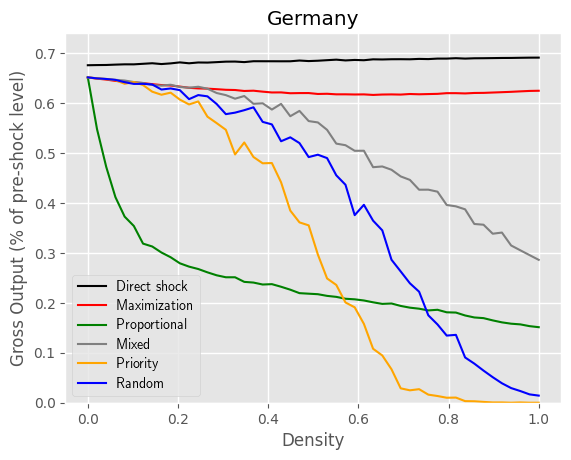

In [49]:
plt.style.use('ggplot')
plt.title("Germany")
plt.grid(visible=None, which='major', axis='both', linestyle='-', linewidth=1)

plt.plot(densseq, resdir_x, 'black')
plt.plot(densseq, resmax_x, 'red')
plt.plot(densseq, resprop_x, 'green')
plt.plot(densseq, resmixed_x, 'grey')
plt.plot(densseq, resprior_x, 'orange')
plt.plot(densseq, resrandom_x, 'blue')


#plt.xlim(-0.05, 1) 
plt.ylim(-0.00,0.74)
plt.rcParams['text.usetex'] = True
plt.xlabel('Density')
plt.ylabel("Gross Output (% of pre-shock level)")
plt.legend(['Direct shock', 'Maximization', 'Proportional', 'Mixed', 'Priority', 'Random'])
plt.savefig('plot_deu_density_juist.png')